In [1]:
#pip install quandl

In [1]:
# Dependencies
import json
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from config import API_key
import matplotlib
#import plotly.graph_objects as go

import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine

ImportError: cannot import name 'API_key' from 'config' (C:\Users\nicko\GWUBootCamp_Project3\config.py)

# PRIME RATE
The prime rate is a guiding interest rate that lenders reference when they set interest rates for consumers on things like credit cards, loans or mortgages. The current prime rate is 3.25%.

Average Reported Prime Rate,Weighted by the Amount Loans Priced Relative to Prime, by Base Pricing Rate

In [2]:
#read records 
prime_rate=pd.read_csv("../GWUBootCamp_Project3/static/data/MPRIME.csv")
prime_rate.head()

,Date,MPRIME
0,1949-01-01,2.0
1,1949-01-02,2.0
2,1949-03-01,2.0
3,1949-04-01,2.0
4,1949-05-01,2.0


In [4]:
# change datatype of date column to datetime
prime_rate['Date'] = pd.to_datetime(prime_rate['Date'])

In [5]:
# Filter data for 15 years
filtered_prime_rate = prime_rate.loc[(prime_rate['Date'] >= '2006-01-01') ]
                     
filtered_prime_rate.tail()

,Date,MPRIME
860,2020-09-01,3.25
861,2020-10-01,3.25
862,2020-11-01,3.25
863,2020-12-01,3.25
864,2021-01-01,3.25


In [6]:
# set Date column as index 
filtered_prime_rate_df =filtered_prime_rate.set_index('Date')
filtered_prime_rate_df.tail()

,MPRIME
Date,
2020-09-01,3.25
2020-10-01,3.25
2020-11-01,3.25
2020-12-01,3.25
2021-01-01,3.25


# GROUP THE PRIME RATE BY YEAR AND AGRREGATE BY AVERAGE

In [7]:
# prime_rate_grouped_avg = filtered_prime_rate_df.groupby(lambda x: x.year)['MPRIME'].agg(['mean'])
# prime_rate_grouped_avg



# Effective Federal Funds Rate
Federal funds rate is the target interest rate set by the Federal Open Market Committee (FOMC) at which commercial banks borrow and lend their excess reserves to each other overnight

In [8]:
fed_funds_rate = quandl.get("FRED/EFFR", authtoken = API_key)
fed_funds_rate.tail()

,Value
Date,
2021-03-05,0.07
2021-03-08,0.07
2021-03-09,0.07
2021-03-10,0.07
2021-03-11,0.07


In [9]:
# reset index 
fed_funds_rate=fed_funds_rate.reset_index()
fed_funds_rate.tail()

,Date,Value
5190,2021-03-05,0.07
5191,2021-03-08,0.07
5192,2021-03-09,0.07
5193,2021-03-10,0.07
5194,2021-03-11,0.07


In [10]:
# filter feds funds rate to 15 years

fed_funds_rate_filter = fed_funds_rate.loc[(fed_funds_rate['Date'] >= '2006-01-01') ]
                     
fed_funds_rate_filter.tail()

,Date,Value
5190,2021-03-05,0.07
5191,2021-03-08,0.07
5192,2021-03-09,0.07
5193,2021-03-10,0.07
5194,2021-03-11,0.07


In [11]:
# set Date as index
fed_funds_rate_filter =fed_funds_rate_filter.set_index('Date')
fed_funds_rate_filter.tail()

,Value
Date,
2021-03-05,0.07
2021-03-08,0.07
2021-03-09,0.07
2021-03-10,0.07
2021-03-11,0.07


# Oil prices
DESCRIPTION: Reference Price for the OPEC Crude Oil Basket. Currently includes: Saharan Blend (Algeria), Girassol (Angola), Oriente (Ecuador), Iran Heavy (Islamic Republic of Iran), Basra Light (Iraq), Kuwait Export (Kuwait), Es Sider (Libya), Bonny Light (Nigeria), Qatar Marine (Qatar), Arab Light (Saudi Arabia), Murban (UAE) and Merey (Venezuela).

In [12]:
oil_prices = quandl.get("OPEC/ORB", authtoken= API_key)
oil_prices.tail()

,Value
Date,
2021-03-05,67.03
2021-03-08,68.17
2021-03-09,66.38
2021-03-10,65.60
2021-03-11,67.39


In [13]:
oil_prices_df=oil_prices.reset_index()
oil_prices_df.tail()

,Date,Value
4687,2021-03-05,67.03
4688,2021-03-08,68.17
4689,2021-03-09,66.38
4690,2021-03-10,65.60
4691,2021-03-11,67.39


In [14]:
# Filter data for 15 years
filtered_oil_prices = oil_prices_df.loc[(oil_prices_df['Date'] >= '2006-01-01') ]
                    
filtered_oil_prices.tail()

,Date,Value
4687,2021-03-05,67.03
4688,2021-03-08,68.17
4689,2021-03-09,66.38
4690,2021-03-10,65.60
4691,2021-03-11,67.39


In [15]:
filtered_oil_prices_df =filtered_oil_prices.set_index('Date')
filtered_oil_prices_df.tail()

,Value
Date,
2021-03-05,67.03
2021-03-08,68.17
2021-03-09,66.38
2021-03-10,65.60
2021-03-11,67.39


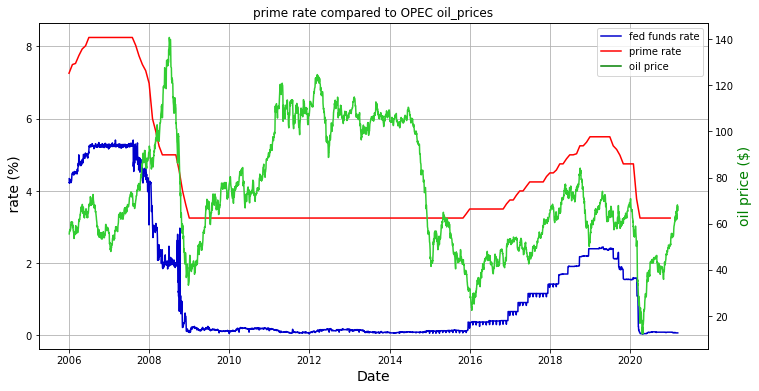

In [16]:
# create figure and axis objects with subplots() for prime rates
fig,ax = plt.subplots(figsize =(12,6))

# make a plot
ax.plot(fed_funds_rate_filter.Value, color="MediumBlue",label ="fed funds rate")
ax.plot(filtered_prime_rate_df.MPRIME, color="red",label ="prime rate")

ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel(" rate (%)",fontsize=14)
ax.set_title("prime rate")


# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# make a plot with different y-axis using second axis object  by add oil_data to same plot
ax2.plot(filtered_oil_prices_df.Value,  color="LimeGreen", label = "oil price")
ax2.set_ylabel("oil price ($)", color="green", fontsize=14)
ax.set_title("prime rate compared to OPEC oil_prices")

ax.plot(np.nan, '-g', label = 'oil price')
ax.legend(loc=0)


ax.grid()
plt.show()
# save the plot as a file
fig.savefig('prime_rate_compared_to_OPEC_oil_prices.jpg',
            format='jpeg',
            dpi=150,
            bbox_inches='tight')


# United States Misery index
DESCRIPTION: How miserable do you feel? The misery index was initiated by economist Arthur Okun, an adviser to President Lyndon Johnson in the 1960's. It is simply the unemployment rate added to the inflation rate. It is assumed that both a higher rate of unemployment and a worsening of inflation both create economic and social costs for a country. A combination of rising inflation and more people out of work implies a deterioration in economic performance and a rise in the misery index.

In [17]:
Misery_index = quandl.get("USMISERY/INDEX", authtoken = API_key)
Misery_index.tail()


,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-10-31,6.9,1.18,8.08
2020-11-30,6.7,1.17,7.87
2020-12-31,6.7,1.36,8.06
2021-01-31,6.3,1.40,7.70
2021-02-28,6.2,1.68,7.88


In [18]:
Misery_index_df=Misery_index.reset_index()
Misery_index_df.tail()

,Date,Unemployment Rate,Inflation Rate,Misery Index
869,2020-10-31,6.9,1.18,8.08
870,2020-11-30,6.7,1.17,7.87
871,2020-12-31,6.7,1.36,8.06
872,2021-01-31,6.3,1.40,7.70
873,2021-02-28,6.2,1.68,7.88


In [19]:
# Filter data for 15 years
Misery_index_filtered = Misery_index_df.loc[(Misery_index_df['Date'] >= '2006-01-01') ]
                    
Misery_index_filtered.tail()

,Date,Unemployment Rate,Inflation Rate,Misery Index
869,2020-10-31,6.9,1.18,8.08
870,2020-11-30,6.7,1.17,7.87
871,2020-12-31,6.7,1.36,8.06
872,2021-01-31,6.3,1.40,7.70
873,2021-02-28,6.2,1.68,7.88


In [20]:
#set index
Misery_index_filtered_df = Misery_index_filtered.set_index('Date')
Misery_index_filtered_df.tail(5)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-10-31,6.9,1.18,8.08
2020-11-30,6.7,1.17,7.87
2020-12-31,6.7,1.36,8.06
2021-01-31,6.3,1.40,7.70
2021-02-28,6.2,1.68,7.88


# GROUP THE MISERY INDEX BY YEAR AND AGRREGATE BY AVERAGE

In [21]:
# misery_index_grouped_avg = Misery_index_filtered_df.groupby(lambda x: x.year)['Misery Index'].agg(['mean'])

# # misery_index_grouped_avg_df= pd.DataFrame (misery_index_grouped_avg, columns = ['YDate','misery index'])
# # misery_index_grouped_avg_df.head()

# PLOT PRIME RATE AND MISERY INDEX

In [22]:
# # create figure and axis objects with subplots() for prime rates
# fig,ax = plt.subplots(figsize =(12,6))

# # make a plot
# ax.plot(filtered_prime_rate_df.MPRIME,  color="purple",label ="prime rate")
# # set x-axis label
# ax.set_xlabel("Date",fontsize=14)
# # set y-axis label
# ax.set_ylabel(" rate (%)",fontsize=14,color="purple")
# ax.set_title("prime rate")


# # twin object for two different y-axis on the sample plot
# ax2 = ax.twinx()

# # make a plot with different y-axis using second axis object  by add oil_data to same plot
# ax2.plot(Misery_index_filtered_df['Misery Index'] , color="blue", label = "misery index")
# ax2.set_ylabel("misery index", color="blue", fontsize=14)
# ax.set_title("prime rate compared to misery")

# ax.plot(np.nan, '-b', label = 'misery index')
# ax.legend(loc=0)


# ax.grid()
# plt.show()
# # save the plot as a file
# fig.savefig('prime_rate_compared_to_misery.jpg',
#             format='jpeg',
#             dpi=150,
#             bbox_inches='tight')


In [23]:
from config import remote_db_endpoint, remote_db_port
from config import remote_db_name, remote_db_user, remote_db_pwd
import mysql.connector

In [24]:
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [25]:
# filtered_prime_rate_df.to_sql(name='us_prime_rate', con=engine, if_exists = 'replace', index=True)

# Misery_index_filtered_df.to_sql(name='misery_index', con=engine, if_exists = 'replace', index=True)

# filtered_oil_prices_df.to_sql(name='oil_prices', con=engine, if_exists = 'replace', index=True)

In [26]:
# fig = go.Figure(go.Indicator(
#     mode = "gauge+number",
#     value = 9.27,
#     domain = {'x': [0, 1], 'y': [0, 1]},
#     title = {'text': "Misery index"}))

# fig.show()



Text(0, 0.5, 'rate(%)')

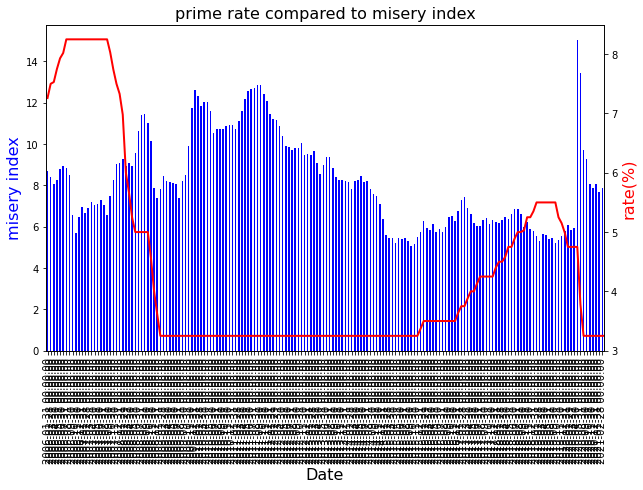

In [27]:
# create bar plot for misery index
# create line plot for prime rate
fig = plt.figure(figsize=(10,6))
ax = Misery_index_filtered_df['Misery Index'].plot(kind='bar', use_index=True,color='blue')
ax.set_title('prime rate compared to misery index', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('misery index', fontsize=16, color='blue')

ax2 = ax.twinx()
ax2.plot(filtered_prime_rate_df['MPRIME'].values, linestyle='-', linewidth=2.0, color='red')
ax2.set_xlabel('Date', fontsize=16)
ax2.set_ylabel('rate(%)', fontsize=16, color='red')



# create a single dataframe for all data

In [28]:
# filtered_prime_rate_df.head()
# filtered_oil_prices_df.head()
# Misery_index_filtered_df.head()

In [29]:
# merged_prime_oil = pd.merge(filtered_prime_rate_df, filtered_oil_prices_df,  how = "inner", on ="Date")
# merged_prime_oil.head()

In [30]:
# merged_prime_oil_misery = pd.merge(merged_prime_oil, Misery_index_filtered_df, how = "right", on = "Date")
# merged_prime_oil_misery.tail()

In [31]:
# merged_prime_oil_misery_df = merged_prime_oil_misery.fillna(0)
# merged_prime_oil_misery_df.tail() 

In [32]:
# merged_prime_oil_misery_df = merged_prime_oil_misery.fillna(0)
# merged_prime_oil_misery_df.tail() 

In [33]:
# create figure and axis objects with subplots() for prime rates
# fig,ax = plt.subplots(figsize =(12,6))

# # make a plot
# ax.plot(fed_funds_rate_filter.Value, color="MediumBlue",label ="fed funds rate")
# ax.plot(merged_prime_oil_misery_df.MPRIME, color="red", label ="prime rate")

# ax.set_xlabel("Date",fontsize=14)
# # set y-axis label
# ax.set_ylabel(" rate (%)",fontsize=14)
# ax.set_title("prime rate")


# # twin object for two different y-axis on the sample plot
# ax2 = ax.twinx()

# # make a plot with different y-axis using second axis object  by add oil_data to same plot
# ax2.plot(merged_prime_oil_misery_df.Value,  color="Green", label = "oil price")
# ax2.set_ylabel("oil price ($)", color="green", fontsize=14)
# ax.set_title("prime rate compared to OPEC oil_prices")

# ax.plot(np.nan, '-g', label = 'oil price')
# ax.legend(loc=0)


# ax.grid()
# plt.show()
# # save the plot as a file
# fig.savefig('prime_rate_compared_to_OPEC_oil_prices.jpg',
#             format='jpeg',
#             dpi=150,
#             bbox_inches='tight')


In [34]:
# # create bar plot for misery index
# # create line plot for prime rate
# fig = plt.figure(figsize=(10,6))
# ax = merged_prime_oil_misery_df['Misery Index'].plot(kind='bar', use_index=True, color='blue')
# ax.set_title('prime rate compared to misery index', fontsize=16)
# ax.set_xlabel('Date', fontsize=16)
# ax.set_ylabel('misery index', fontsize=16, color='blue')

# ax2 = ax.twinx()
# ax2.plot(merged_prime_oil_misery_df['MPRIME'].values, linestyle='-', linewidth=2.0, color='red')
# ax2.set_xlabel('Date', fontsize=16)
# ax2.set_ylabel('rate(%)', fontsize=16, color='red')



In [35]:
# query = pd.read_sql("select * from us_prime_rate",conn)
# data_prime =query.to_json(orient ="records")

In [36]:
# query = pd.read_sql('select * from misery_index where Date ="2020-07-31"',conn)
# query

In [37]:
# query = pd.read_sql("select * from oil_prices",conn)
# data_oil =query.to_json(orient ="records")
